In [1]:
import tensorflow as tf
import numpy as np
from NeuralFlow.flow import Flow_v2

2024-11-18 16:07:11.731919: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-18 16:07:11.783696: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def create_base_model(input_shape=1, output_shape=1):
    inputs = tf.keras.Input(shape=(input_shape,))
    x = tf.keras.layers.Dense(512, activation='relu')(inputs)
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    outputs = tf.keras.layers.Dense(output_shape, activation='tanh')(x)
    return tf.keras.Model(inputs, outputs)


In [3]:
flow = Flow_v2(
    model_fn = create_base_model,
    n_models = 3,
    noise_stddev=1e-2, 
    lam = 1e-4)

In [4]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

flow.compile(optimizer_fn=lambda :tf.keras.optimizers.Adam(1e-3), loss_fn=loss_fn, metrics=['mae'])

2024-11-18 16:07:20.506885: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14408 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:1a:00.0, compute capability: 8.6
2024-11-18 16:07:20.507951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14408 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:1b:00.0, compute capability: 8.6
2024-11-18 16:07:20.508926: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 14408 MB memory:  -> device: 2, name: NVIDIA RTX A4000, pci bus id: 0000:3d:00.0, compute capability: 8.6
2024-11-18 16:07:20.509753: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 14408 MB memory:  -> device: 3, name: NVIDIA RTX A4000, pci bus id: 0000:3e:00.0, 

In [5]:
X_train = tf.cast(np.linspace(0, 1, 1000).reshape(-1, 1), tf.float32)
y_train = tf.cast(np.sin(X_train * 2 * np.pi).reshape(-1, 1), tf.float32)

batch_size = 32
loader_size = X_train.shape[0] // batch_size

In [6]:
flow.fit(X_train, y_train, batch_size=batch_size, epochs=50)

Epoch 1/50


2024-11-18 16:07:21.712227: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-11-18 16:07:21.754463: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5611cc53f440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-18 16:07:21.754505: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-11-18 16:07:21.754512: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA RTX A4000, Compute Capability 8.6
2024-11-18 16:07:21.754518: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA RTX A4000, Compute Capability 8.6
2024-11-18 16:07:21.754524: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (3): NVIDIA RTX A4000, Compute Capability 8.6
2024-11-18 16:07:21.754528: I te

32/32 - 2s - loss: 14808867.0000 - mae: 0.4714 - 2s/epoch - 53ms/step
Epoch 2/50
32/32 - 0s - loss: 4617342.0000 - mae: 0.2464 - 181ms/epoch - 6ms/step
Epoch 3/50
32/32 - 0s - loss: 2920469.2500 - mae: 0.1569 - 182ms/epoch - 6ms/step
Epoch 4/50
32/32 - 0s - loss: 2597734.7500 - mae: 0.1261 - 183ms/epoch - 6ms/step
Epoch 5/50
32/32 - 0s - loss: 2533458.5000 - mae: 0.1307 - 181ms/epoch - 6ms/step
Epoch 6/50
32/32 - 0s - loss: 2450815.0000 - mae: 0.1237 - 184ms/epoch - 6ms/step
Epoch 7/50
32/32 - 0s - loss: 2381606.2500 - mae: 0.1269 - 185ms/epoch - 6ms/step
Epoch 8/50
32/32 - 0s - loss: 2298006.0000 - mae: 0.1209 - 185ms/epoch - 6ms/step
Epoch 9/50
32/32 - 0s - loss: 2168395.2500 - mae: 0.1171 - 188ms/epoch - 6ms/step
Epoch 10/50
32/32 - 0s - loss: 2059872.3750 - mae: 0.1155 - 190ms/epoch - 6ms/step
Epoch 11/50
32/32 - 0s - loss: 1898050.1250 - mae: 0.1132 - 185ms/epoch - 6ms/step
Epoch 12/50
32/32 - 0s - loss: 1780246.7500 - mae: 0.1110 - 183ms/epoch - 6ms/step
Epoch 13/50
32/32 - 0s - 

In [7]:
est = flow.get_estimator("deep_ensemble")

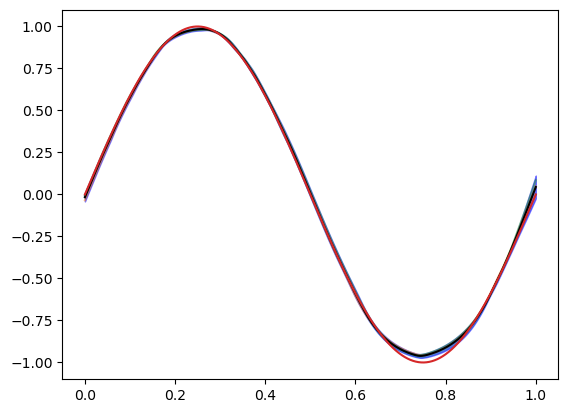

In [8]:
import matplotlib.pyplot as plt

# print(est.logp, est.logq)
mean, var = est(X_train)
fig = plt.figure()

for model in flow.models:
    plt.plot(X_train, model(X_train), alpha=0.5)

plt.plot(X_train, mean.squeeze(), color='black')
plt.fill_between(tf.squeeze(X_train), mean.squeeze() - 1.96 * np.sqrt(var.squeeze()),  mean.squeeze() + 1.96 * np.sqrt(var.squeeze()), color='blue', alpha=0.5)


plt.plot(X_train, y_train)